In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random

## 0、数据处理成csv形式

In [417]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
          'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
df_train_set = pd.read_csv('./adult.data', names=columns)
df_test_set = pd.read_csv('./adult.test', names=columns, skiprows=1) #第一行是非法数据

print(df_train_set.head())
print(df_test_set.head())
df_train_set.to_csv('./train_adult.csv', index=False)
df_test_set.to_csv('./test_adult.csv', index=False)

   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   United-States   <=50K  
1         

In [418]:
df_test_set.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [419]:
len(df_train_set), len(df_test_set), len(df_test_set.columns)

(32561, 16281, 15)

## 1、数据读取

In [420]:
df_train_set = pd.read_csv('./train_adult.csv')
df_train_set

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2、数据预处理

### 2.1 删除对应属性

In [421]:
df_train_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
print(df_train_set.columns)

Index(['age', 'workclass', 'education', 'maritalStatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'nativeCountry', 'income'],
      dtype='object')


### 2.2 重复行记录处理

In [475]:
df_train_set.drop_duplicates(inplace=True) # 去除重复行

In [423]:
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### 2.3 缺失值处理

In [424]:
df_train_set[df_train_set.isna().values == True] # 输出有缺失值的数据行

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [425]:
df_train_set.dropna(inplace=True) # 去除空行 

### 2.4 查看列类型

In [426]:
df_train_set.dtypes

age               int64
workclass        object
education        object
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
income           object
dtype: object

### 2.5 异常值处理

In [427]:
df_train_set[df_train_set['workclass'].str.contains(r'\?', regex=True)] # 查找异常值, 避免与正则表达式的?冲突需要转义

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [428]:
df_train_set=df_train_set[~df_train_set['workclass'].str.contains(r'\?', regex=True)]
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [429]:
#删除有异常值的行
new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
for col in new_columns:
        df_train_set = df_train_set[~df_train_set[col].str.contains(r'\?', regex=True)]
df_train_set.head()

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.6 数据可视化，以年龄为例

<AxesSubplot:ylabel='Frequency'>

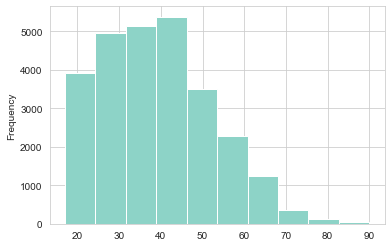

In [430]:
df_train_set['age'].plot.hist()

<AxesSubplot:>

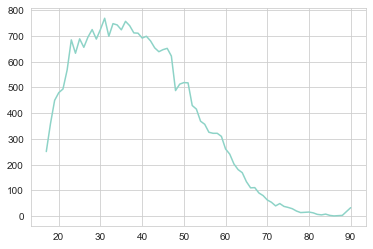

In [431]:
df_train_set['age'].value_counts().sort_index().plot.line()

d:\miniconda\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\miniconda\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


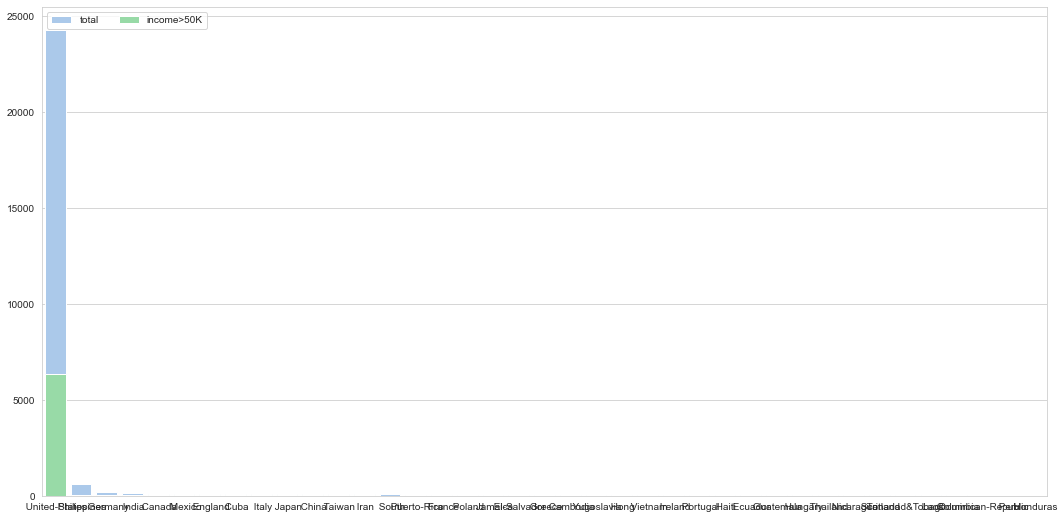

In [432]:
df_train_set = df_train_set.reset_index(drop=True) #重置索引
df_train_set['nativeCountry'].isnull() == True
s=df_train_set['nativeCountry'].value_counts()
k=df_train_set['nativeCountry'][df_train_set['income']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(s.index,s.values,label='total',color="b")
sns.barplot(k.index,k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

d:\miniconda\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\miniconda\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


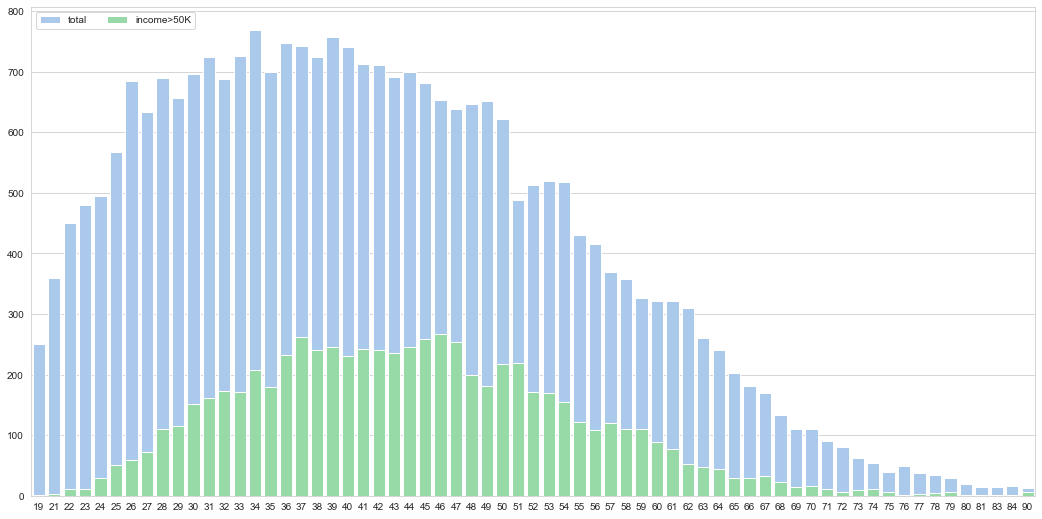

In [433]:
# 画出年龄与收入的关系

df_train_set = df_train_set.reset_index(drop=True) #重置索引
df_train_set['age'].isnull() == True
s=df_train_set['age'].value_counts()
k=df_train_set['age'][df_train_set['income']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(s.index,s.values,label='total',color="b")
sns.barplot(k.index,k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

### 2.7 连续型变量处理

In [434]:
continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

In [435]:
# df_train_set['age'].max(), df_train_set['age'].min()
# print(df_train_set['capitalGain'].max(), df_train_set['capitalGain'].min())
print(df_train_set['capitalLoss'].max(), df_train_set['capitalLoss'].min())
# df_train_set['hoursPerWeek'].max(), df_train_set['hoursPerWeek'].min()

4356 0


In [436]:
bins = [0, 25, 50, 75, 100]  # 分箱区间左开右闭 (0, 25], (25, 50], ...
bins1 = [-1, 1, 1000000]
bins2 = [-1, 1, 4000]
df_train_set['age'] = pd.cut(df_train_set['age'], bins, labels=False)
df_train_set['capitalGain'] = pd.cut(
    df_train_set['capitalGain'], bins1, labels=False)
df_train_set['capitalLoss'] = pd.cut(
    df_train_set['capitalLoss'], bins1, labels=False)
df_train_set['hoursPerWeek'] = pd.cut(
    df_train_set['hoursPerWeek'], bins, labels=False)

In [437]:
print(df_train_set['capitalLoss'])

0        0
1        0
2        0
3        0
4        0
        ..
26899    0
26900    0
26901    0
26902    0
26903    0
Name: capitalLoss, Length: 26904, dtype: int64


### 2.8 离散型变量处理

In [438]:
discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']

In [439]:
df_train_set['workclass'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [440]:
df_train_set['workclass'].head() #展示前五条

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [441]:
# df_train_set['workclass'].value_counts().keys()
# df_train_set['education'].value_counts().keys()
# df_train_set['maritalStatus'].value_counts().keys()
# df_train_set['occupation'].value_counts().keys()
# df_train_set['relationship'].value_counts().keys()
# df_train_set['race'].value_counts().keys()
# df_train_set['sex'].value_counts().keys()
# df_train_set['nativeCountry'].value_counts().keys()
df_train_set['income'].value_counts().keys()

Index([' <=50K', ' >50K'], dtype='object')

<AxesSubplot:>

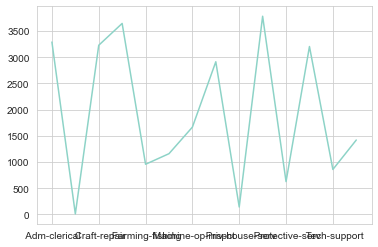

In [442]:
df_train_set['occupation'].value_counts().sort_index().plot.line()

In [443]:
workclass_mapping = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 1, ' Local-gov': 2,
                     ' State-gov': 2, ' Federal-gov': 2, ' Without-pay': 3, ' Never-worked': 3}
df_train_set['workclass'] = df_train_set['workclass'].map(workclass_mapping)

education_mapping = {' HS-grad': 0, ' Some-college': 0, ' Bachelors': 0, ' Masters': 1, ' Assoc-voc': 2,
                     ' Assoc-acdm': 2, ' 11th': 3, ' 10th': 3, ' 7th-8th': 3, ' Prof-school': 2, ' 9th': 3,
                     ' Doctorate': 2, ' 12th': 3, ' 5th-6th': 3, ' 1st-4th': 3, ' Preschool': 3}
df_train_set['education'] = df_train_set['education'].map(education_mapping)

maritalStatus_mapping = {' Married-civ-spouse': 0, ' Never-married': 1, ' Divorced': 1, ' Separated': 2,
                         ' Widowed': 2, ' Married-spouse-absent': 2, ' Married-AF-spouse': 2}
df_train_set['maritalStatus'] = df_train_set['maritalStatus'].map(
    maritalStatus_mapping)

occupation_mapping = {' Prof-specialty': 0, ' Exec-managerial': 0, ' Adm-clerical': 2, ' Craft-repair': 1,
                      ' Sales': 1, ' Other-service': 2, ' Machine-op-inspct': 2, ' Transport-moving': 2,
                      ' Handlers-cleaners': 2, ' Farming-fishing': 2, ' Tech-support': 2,
                      ' Protective-serv': 2, ' Priv-house-serv': 3, ' Armed-Forces': 3}
df_train_set['occupation'] = df_train_set['occupation'].map(occupation_mapping)

relationship_mapping = {' Husband': 0, ' Not-in-family': 1, ' Own-child': 2, ' Unmarried': 1, ' Wife': 1,
                        ' Other-relative': 2}
df_train_set['relationship'] = df_train_set['relationship'].map(
    relationship_mapping)

race_mapping = {' White': 0, ' Black': 1, ' Asian-Pac-Islander': 1, ' Amer-Indian-Eskimo': 2,
                ' Other': 2}
df_train_set['race'] = df_train_set['race'].map(race_mapping)

sex_mapping = {' Male': 0, ' Female': 1}
df_train_set['sex'] = df_train_set['sex'].map(sex_mapping)

nativeCountry_mapping = {' United-States': 0, ' Mexico': 1, ' Philippines': 1, ' Germany': 1, ' Puerto-Rico': 1,
                         ' Canada': 1, ' India': 1, ' El-Salvador': 1, ' Cuba': 1, ' England': 1, ' Jamaica': 1,
                         ' South': 1, ' China': 1, ' Italy': 1, ' Dominican-Republic': 1, ' Vietnam': 1,
                         ' Guatemala': 1, ' Japan': 1, ' Poland': 1, ' Columbia': 1, ' Iran': 1, ' Taiwan': 1,
                         ' Haiti': 1, ' Portugal': 1, ' Nicaragua': 1, ' Peru': 1, ' Greece': 1, ' France': 1,
                         ' Ecuador': 1, ' Ireland': 1, ' Hong': 1, ' Cambodia': 1, ' Trinadad&Tobago': 1,
                         ' Thailand': 1, ' Laos': 1, ' Yugoslavia': 1, ' Outlying-US(Guam-USVI-etc)': 1,
                         ' Hungary': 1, ' Honduras': 1, ' Scotland': 1, ' Holand-Netherlands': 1}
df_train_set['nativeCountry'] = df_train_set['nativeCountry'].map(
    nativeCountry_mapping)

income_mapping = {' <=50K': 0, ' >50K': 1}
df_train_set['income'] = df_train_set['income'].map(income_mapping)


In [446]:
df_train_set['workclass'].head()
df_train_set.to_csv('./after_train_adult.csv', index=False)
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,1,2,0,1,2,1,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,2,1,0,0,0,0,1,0,0
3,2,0,3,0,2,0,1,0,0,0,1,0,0
4,1,0,0,0,0,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,2,0,1,0,0,0,0,0,0,0,1,0,1
26900,0,0,0,1,2,1,0,0,0,0,1,0,0
26901,1,0,2,0,2,1,0,1,0,0,1,0,0
26902,2,0,0,2,2,1,0,1,0,0,1,0,0


In [469]:
print(list(df_train_set))

['age', 'workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']


In [ ]:
class TreeNode():#二叉树节点
    def __init__(self,val,lchild=None,rchild=None):
        self.label = ()
        self.val = val		
        self.lchild = lchild		
        self.rchild = rchild		


## 3. 构造决策树，进行训练

In [117]:
from json.encoder import INFINITY


def calc_gini(df):
    """
    计算数据集的基尼指数
    :param df: 数据集
    :return: 基尼指数
    """
    count = 0
    for i in df['income']:
        if i == 0:
            count += 1
    p = count / df.index.stop
    return 1 - p ** 2 - (1-p) ** 2
    
    

def split_dataset(df, index, value):
    """
    按照给定的列划分数据集
    :param df: 原始数据集
    :param index: 指定特征的列索引
    :param value: 指定特征的值
    :return: 切分后的数据集
    """
    groups = df.groupby(df.index)
    return df.get_group(value)

def get_complete_dataset(df, df2):
    df1 = df.append(df2)
    return df1.drop_duplicates(keep=False)
    
def get_feature_num(df, index):
    return len(df[index].value_counts().index)

def choose_best_feature_to_split(df):
    """
    选择最好的特征进行分裂
    :param df: 数据集
    :return: best_value:(分裂特征的index, 特征的值), best_df:(分裂后的左右子树数据集), best_gini:(选择该属性分裂的最小基尼指数)
    """
    best_gini = INFINITY
    column_name = list(df)
    res = 0
    for i in range(df.shape[1]):
        index = column_name[i]
        for j in range(get_feature_num(df, index)):
            df_after = split_dataset(df, index, j)
            df_after_comp = get_complete_dataset(df, df_after)
            res = df_after.shape[0] / df.shape[0] * calc_gini(df_after) + df_after_comp.shape[0] / df.shape[0] * calc_gini(df_after_comp)
            if res < best_gini:
                best_value, best_df_l, best_df_r, best_gini = (index, j), df_after, df_after_comp, res
    return best_value, best_df_l, best_df_r, best_gini
        
def is_same_gini(df, columns):
    """
    判断数据集以某特征分裂的基尼指数是否相同
    :param columns: 数据集
    :return: True or False
    """
    list = set()
    for i in range(len(columns)):
        index = columns[i]
        for j in range(get_feature_num(df, index)):
            df_after = split_dataset(df, index, j)
            df_after_comp = get_complete_dataset(df, df_after)
            res = df_after.shape[0] / df.shape[0] * calc_gini(df_after) + df_after_comp.shape[0] / df.shape[0] * calc_gini(df_after_comp)
            list.add(res)
    if len(list) == 1:
        return True
    else:
        return False

def getMostCa(df):
    """
    返回数据集中出现次数最多的类别
    :param df: 数据集
    :return: 类别
    """
    
    column_name = list(df)
    ca = (column_name[0], 0)
    for i in range(df.shape[1]):
        for key, value in df[column_name[i]].value_counts().items():
            if value > ca[1]:
                ca = (column_name[i], key)
    return ca

def build_decision_tree(df, columns, flags):
    """
    构建CART树 
    :param df: 数据集
    :param columns: 特征列表
    :param flags: 区分特征是否被完全区分开,初始为全0, 若某个特征被区分开那么flags对应的下标为0
    :return: CART树
    """
    for i in range(len(flags)):
        index = get_feature_num(df, i)
        if index == 1:
            flags[i] = 0
        else:
            flags[i] = 1
    node = TreeNode(df, None, None)
    for i in range (len(flags)):
        if flags[i] == 0:
            node.label = (columns[i], df[columns[i]][0])
            return node
    if len(columns) == 0 or is_same_gini(df, columns):
        node.label = getMostCa(df)
        return node
    best_value, best_df_l, best_df_r, best_gini = choose_best_feature_to_split(df)

    # 递归结束情况1: 若当前集合的所有样本标签相等,即样本已被分"纯",则可以返回该标签值作为一个叶子节点
    # 递归结束情况2: 若当前训练集的所有特征都被使用完毕,当前无可用特征但样本仍未分"纯"，则返回样本最多的标签作为结果
    
    
def save_decision_tree(cart):
    """
    决策树的存储
    :param cart: 训练好的决策树
    :return: void
    """
    np.save('cart.npy', cart)
    
    
def load_decision_tree():
    """
    决策树的加载
    :return: 保存的决策树
    """    
    
    cart = np.load('cart.npy', allow_pickle=True)
    return cart.item()


In [471]:
df_train = df_train_set.copy() #防止预处理重新来

In [472]:
columns = df_train.columns.to_list()
flags = [0 for i in range(len(columns))]

In [474]:
df_train.head()
print(flags)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [121]:
cart = build_decision_tree(df_train, columns, flags)
save_decision_tree(cart)

## 4. 评估

In [122]:
def classify(cart, df_row, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df_row: 一条测试样本
    :param columns: 特征列表
    :return: 预测结果
    """
    


def predict(cart, df, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df: 所有测试集
    :param columns: 特征列表
    :return: 预测结果
    """
    pred_list = []
    for i in range(len(df)):
        pred_label = classify(cart, df.iloc[i,:], columns)
        if pred_label == -1:
            pred_label = random.randint(0, 1) # 防止classify执行到返回-1,但一般不会执行到返回-1
        pred_list.append(pred_label)
    return pred_list

def calc_acc(pred_list, test_list):
    """
    返回预测准确率
    :param pred_list: 预测列表
    :param test_list: 测试列表
    :return: 准确率
    """
    pred = np.array(pred_list)
    test = np.array(test_list)
    acc = np.sum(pred_list == test_list) / len(test_list)
    return acc

## 5. Demo

#### (1) 下面只是测试模型能不能跑通,实际操作时需要用测试集进行评估
#### (2) 此外，测试集应该需要做和训练集一样的预处理操作

In [123]:
columns = df_train.columns.to_list()

In [124]:
cart = load_decision_tree() # 加载模型

In [125]:
test_list = df_train['income'].to_numpy()
pred_list = predict(cart, df_train, columns)

In [126]:
acc = calc_acc(pred_list, test_list)

In [127]:
acc

0.0